---
# Objetivo: Treinar 3 modelos iniciais (SGDClassifier, RandomForestClassifier e LogisticRegression) com limpeza na base de dados como lower, stopwords e stemming
---


**1- Descrição do problema ou tarefa:**

Prever a categorias frutas, animais e graos a partir das perguntas.

**2- Descrição da solução de IA:**
Treinamento supervisionado de modelo de classificação as categorias das perguntas (3 classes) com os dados das 16000 perguntas sobre os temas Frutas, animais e graos 

**3- Fonte de dados:**


Livro de perguntas e respostas da Embrapa
https://mais500p500r.sct.embrapa.br/view/index.php4

**4-Variáveis independentes:** 
perguntas

**5- Variável dependente:** 
Categorias frutas, animais e graos


-----------------------------------------------------------------
Autor do caderno: Wellington Rangel
Data: 23/11/2021

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/projeto/

/content/drive/MyDrive/Colab Notebooks/projeto


In [9]:
# Carrega os dados
df = pd.read_csv('dados_agrupados.csv',  sep=',', low_memory=False,encoding='latin-1' )



In [10]:
df.head()

,Numero,Livro,Capitulo,Pergunta,Resposta,Target,Target_final,Target_final1,Target_final2,Target_final3
0,1,Pera,Generalidades,Qual é o centro de origem da pereira?,São citados três centros de origem da pereira:...,Pera,Frutas,NaN,Frutas,NaN
1,2,Pera,Generalidades,Qual é o centro de origem mais importante?,O centro do Oriente Médio é considerado de imp...,Pera,Frutas,NaN,Frutas,NaN
2,3,Pera,Generalidades,Como ocorreu a disseminação da pereira pelo mu...,"Com base em estudos bioquímicos, verificou-se ...",Pera,Frutas,NaN,Frutas,NaN
3,4,Pera,Generalidades,Quais são as espécies de pereira mais cultivad...,"Na Europa, na América do Norte, na América do ...",Pera,Frutas,NaN,Frutas,NaN
4,5,Pera,Generalidades,Quando a pereira foi introduzida no Brasil?,Não há relatos na literatura sobre a introduçã...,Pera,Frutas,NaN,Frutas,NaN


In [11]:
sub = df[['Pergunta', 'Target_final']]

In [12]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")

sub['Pergunta'] = sub['Pergunta'].str.split()

sub['Pergunta'] = sub['Pergunta'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word
sub[:10]['Pergunta']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0          [qual, é, o, centr, de, orig, da, pereira?]
1     [qual, é, o, centr, de, orig, mais, importante?]
2    [com, ocorr, a, dissemin, da, pereir, pel, mun...
3    [qua, sã, as, espéc, de, pereir, mais, cultiv,...
4       [quand, a, pereir, foi, introduz, no, brasil?]
5        [com, foi, a, evolu, da, cultur, no, brasil?]
6    [qual, é, a, regiã, brasileir, mais, indic, pa...
7    [onde, é, produz, per, de, qualidad, no, brasil?]
8    [qua, sã, os, princip, tip, de, per, produz, n...
9    [qual, é, a, époc, de, produçã, de, per, no, s...
Name: Pergunta, dtype: object

In [13]:
sub['Pergunta'] = sub['Pergunta'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
sub.columns = ['texto', 'classe']

In [15]:
sub = sub.dropna()

In [16]:
sub[:10]

,texto,classe
0,qual é o centr de orig da pereira?,Frutas
1,qual é o centr de orig mais importante?,Frutas
2,com ocorr a dissemin da pereir pel mundo?,Frutas
3,qua sã as espéc de pereir mais cultiv no mundo?,Frutas
4,quand a pereir foi introduz no brasil?,Frutas
5,com foi a evolu da cultur no brasil?,Frutas
6,qual é a regiã brasileir mais indic par o cult...,Frutas
7,onde é produz per de qualidad no brasil?,Frutas
8,qua sã os princip tip de per produz no brasil?,Frutas
9,qual é a époc de produçã de per no sul do brasil?,Frutas


In [17]:
sub.iloc[:,0].value_counts()

mais algum pergunta?                                                                                     26
o que é fertirrigação?                                                                                    7
o que é uma cultivar?                                                                                     6
o que é rotaçã de culturas?                                                                               5
o que é adub verde?                                                                                       4
                                                                                                         ..
qua sã as prátic import de control cultural do bicud e o que signif essa modal de combat dess inseto?     1
com preven a salmonelose?                                                                                 1
qua doenc afet os ram do mirtileiro?                                                                      1
com sab qual a densidad adeq

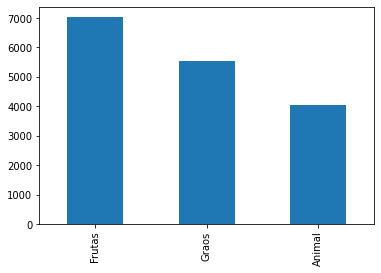

In [18]:
# Mostra balanceamento das classes (gráfico de barras )
sub.classe.value_counts().plot(kind='bar')

In [19]:
# Separa os dados de treino e teste (proporção 80/20, stratify para classes desbalanceadas)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sub.texto, sub.classe, test_size=0.2, 
                                                    stratify=sub.classe,random_state=42)

In [20]:
# Mostra um exemplo do texto.
X_train[0]

'qual é o centr de orig da pereira?'

In [21]:
# Confere a proporção das classes nos dados de treino e de teste
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (13276,) 
 Frutas    0.423923
Graos     0.333308
Animal    0.242769
Name: classe, dtype: float64 

TESTE  :  (3320,) 
 Frutas    0.423795
Graos     0.333434
Animal    0.242771
Name: classe, dtype: float64


In [22]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_features=50000,ngram_range=(1,2))
# # tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# # mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)

Vocabulário: 
{'qual': 37925, 'volum': 49315, 'mundial': 27843, 'export': 20505, 'os': 30615, 'princip': 36380, 'país': 32967, 'de': 12878, 'algodão': 1371, 'qual volum': 38216, 'volum mundial': 49324, 'mundial export': 27851, 'export os': 20509, 'os princip': 30902, 'princip país': 36496, 'país export': 32977, 'export de': 20507, 'de algodão': 12958, 'qua': 37798, 'as': 3526, 'med': 26252, 'recomend': 40338, 'par': 31870, 'control': 10385, 'da': 11754, 'cercosporios': 7206, 'do': 16518, 'milho': 27038, 'qua as': 37805, 'as princip': 3803, 'princip med': 36474, 'med recomend': 26279, 'recomend par': 40380, 'par control': 32047, 'control da': 10415, 'da cercosporios': 11886, 'cercosporios do': 7207, 'do milho': 16883, 'em': 18228, 'que': 38584, 'limit': 24572, 'mínim': 28060, 'pluvios': 34555, 'cultur': 11495, 'gergelim': 21510, 'pod': 34604, 'produzir': 37060, 'em que': 18589, 'que limit': 39143, 'limit mínim': 24585, 'mínim de': 28062, 'de pluvios': 14303, 'pluvios cultur': 34556, 'cu

In [23]:
# encode document
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix tf-idf
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)


Dimensões da matrix: 
(13276, 50000)


## Treina o classificador

In [ ]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()), 
])
#n_estimators=50,max_features=2,min_samples_leaf=1

In [ ]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()), # default hinge. To get probabilities, use loss='log' or 'modified_huber'
])


In [24]:
# Define o pipeline incluindo: tokenização (tfidf_vectorizer) e treinamento do classificador
pipeline = Pipeline([
  
  ('tfidf', TfidfVectorizer(min_df=1, max_features=50000,ngram_range=(1,2))),
    ('clf', SGDClassifier(eta0=0.00001, loss="log", penalty="elasticnet", max_iter=50000,  alpha=1e-06, random_state=42)),
])



In [25]:
%%time
# Treine o modelo(fit) 
classificador = pipeline.fit(X_train, y_train)

CPU times: user 817 ms, sys: 238 ms, total: 1.06 s
Wall time: 801 ms


In [26]:
classificador

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2))),
                ('clf',
                 SGDClassifier(alpha=1e-06, eta0=1e-05, loss='log',
                               max_iter=50000, penalty='elasticnet',
                               random_state=42))])

In [27]:
# Mostra a acurácia do modelo nos dados de teste 
classificador.score(X_test,y_test)

0.8870481927710844

In [28]:
 # Faça a predição nos dados de teste
 predicted = classificador.predict(X_test)

In [29]:
# Mostra o f1 score do modelo nos dados de teste (métrica usada quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predicted, average='weighted') 

0.8872291915021288

In [30]:
# avalie o modelo usando 'classification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

      Animal       0.95      0.88      0.91       806
      Frutas       0.87      0.91      0.89      1407
       Graos       0.86      0.86      0.86      1107

    accuracy                           0.89      3320
   macro avg       0.89      0.88      0.89      3320
weighted avg       0.89      0.89      0.89      3320



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


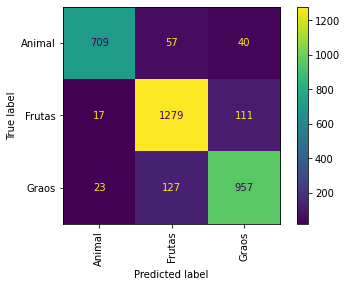

In [31]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test.values.ravel(), values_format='d', xticks_rotation = 'vertical')


### Análise das probabilidades das predições do modelo

In [32]:
# Mostra as probabilidades das classes nos dados de teste (primeiras 5 jurisprudências)
prob_preds= classificador.predict_proba(X_test)
prob_preds[:5]

array([[2.58152192e-04, 1.12106031e-02, 9.88531245e-01],
       [1.89261615e-04, 9.97588279e-01, 2.22245987e-03],
       [8.90525670e-01, 5.83990254e-04, 1.08890340e-01],
       [2.35892064e-04, 9.98374175e-01, 1.38993301e-03],
       [1.06090476e-02, 7.28359556e-04, 9.88662593e-01]])

In [33]:
# Cria dataframe para conferência da confiaça do modelo em cada predição (probabilidades)
df_prob = pd.DataFrame(columns=['texto','actual','predicted', 'prob_pessoal(0)','prob_licit(1)','prob_respo(2)'])
df_prob['texto'] = X_test
df_prob['actual'] = y_test
df_prob['predicted'] = classificador.predict(X_test)
df_prob['prob_pessoal(0)'] = np.round(prob_preds[0:,0],6).tolist()
df_prob['prob_licit(1)'] = np.round(prob_preds[0:,1],6).tolist()
df_prob['prob_respo(2)'] = np.round(prob_preds[0:,2],6).tolist()

In [34]:
# Mostra as 5 primeiras linhas do dataframe criado
print(df_prob.shape)
df_prob.head()

(3320, 6)


,texto,actual,predicted,prob_pessoal(0),prob_licit(1),prob_respo(2)
510,qua sã os princip métod de melhor usad par se ...,Graos,Graos,0.000258,0.011211,0.988531
12305,qual densidad de planti e espac é recomend qua...,Frutas,Frutas,0.000189,0.997588,0.002222
14671,com é defin o tamanh mínim de captur par peixes?,Animal,Animal,0.890526,0.000584,0.108890
1018,por que o term frut de caroço nã se aplic a ...,Frutas,Frutas,0.000236,0.998374,0.001390
7075,por que ocorr abort excess de flor e vagens no...,Graos,Graos,0.010609,0.000728,0.988663


In [35]:
df_prob[(df_prob['predicted'] == 'Graos') & (df_prob['actual'] != df_prob['predicted']) & (df_prob['prob_respo(2)'] < 0.7)]

,texto,actual,predicted,prob_pessoal(0),prob_licit(1),prob_respo(2)
2930,o que é titul de produt retorcidos?,Frutas,Graos,0.319510,0.012859,0.667630
5708,20 kg que sã micronutrientes?,Frutas,Graos,0.293574,0.032231,0.674195
16249,quand se dev usar o calcário?,Frutas,Graos,0.016900,0.472396,0.510704
1194,qua sã os fertiliz mais indic na etap de corre...,Frutas,Graos,0.000051,0.425593,0.574357
11477,que import o problem acarret par a cultura?,Frutas,Graos,0.007817,0.448227,0.543956
...,...,...,...,...,...,...
15819,a farinh da part aér da mandioc pod ser usad p...,Animal,Graos,0.335200,0.000037,0.664763
6313,qual é a melhor estratég par o agricultor expl...,Frutas,Graos,0.430744,0.094981,0.474275
2652,quand o tratament de sement é recomendado?,Frutas,Graos,0.003277,0.348626,0.648097
15818,que problem apresent par os suín a farinh da p...,Animal,Graos,0.466564,0.000002,0.533434


In [ ]:
# Salva o dataframe de probabilidades em disco para uso futuro
df_prob.to_csv('/content/drive/MyDrive/Colab Notebooks/projeto/modelos/chat_prob.csv', index=None)

### Salva o modelo em disco para uso futuro (colocar em produção)

In [ ]:
# Carrega biblioteca para salvar e carregar o modelo treinado (joblib)
import joblib

# Salvando o modelo para posterior reuso
joblib.dump(classificador, '/content/drive/MyDrive/Colab Notebooks/projeto/modelos/modelo_chatbot_p1.pkl')

['/content/drive/MyDrive/Colab Notebooks/projeto/modelos/modelo_chatbot_p1.pkl']